<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 2

## Q1: Show that the correlation co-efficient is indeed related to the fraction of varaince explained by a linear dependence.

**1** To start, make a $N(0,1)$ random variable $x$, with 200,000 entries.  Then make a linearly dependent variable $y_i= a x_i + n_i$, where a is some amplitude, and $n_i$ is a random noise varaible.  Assume that $n_i$ is distributed as $N(0,n)$, where $n$ is the noise level.

Calculate the correlation co-efficient $r_{xy}$ between $x$ and $y$ for 40 different values of $n$, logarithmically spaced between 0.01 and 100. (hint use `np.logspace`).  

Plot $r_{xy}$ versus the inverse of the noise $n$ normalized by the standard devaition of the signal $ax_i$: $\frac{a s_x}{n}$   You may want to use `ax.loglog` to visualize the orders of magnitude.  

Comment on the resulting comparison.

#### Coding hint:

You are going to need to generate 40 realizations of the random process, so do this in a `for`-loop, and save the results in an array that you initialize before the for-loop:
```python
r = np.zeros(40)
for ind,n in enumerate(noisevalues):
  # make your random variable
  ...
  # calculate r
  r[ind]=...
```
<hr>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

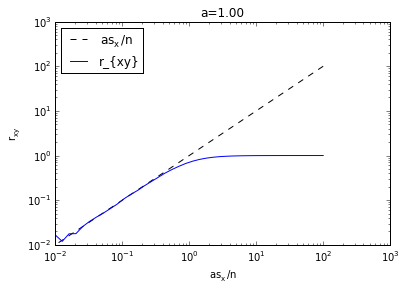

In [11]:
Ndat=200000
a=1.
x = np.random.randn(Ndat)

ns=np.logspace(-2,2,40)
r = np.zeros(40)
for ind,n in enumerate(ns):
    ni = n*np.random.randn(Ndat)
    y = a*x+ni
    
    xx = x-np.mean(x)
    yy = y-np.mean(y)
    r[ind] = sum(xx*yy)/np.std(x)/np.std(y)/(Ndat-1)
 
fig,ax=plt.subplots(1,1)
ax.loglog(1./(ns/a/np.std(x)),1./(ns/a/np.std(x)),'k--',label='$a s_x / n$');
ax.loglog(1./(ns/a/np.std(x)),r,label='r_{xy}') 
ax.legend(loc=2)
ax.set_xlabel('$a s_x/n$')  
ax.set_ylabel('$r_{xy}$')  
ax.set_title('a=%1.2f'%a)
    

So, as the signal comes out of the noise the correlation between $x(t)$ and $y(t)$ reaches 1.  

**2** Repeat the above, but with a different value of $a$.  Comment on how (and why) $a$ changes the value of $r_{xy}$.  

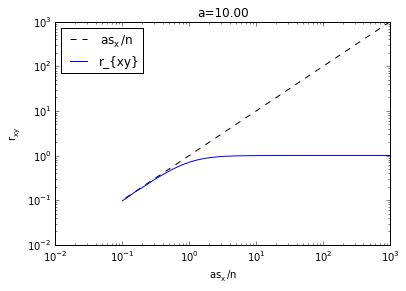

In [12]:
import numpy as np
import matplotlib.pyplot as plt
Ndat=200000
a=10.
x = np.random.randn(Ndat)

ns=np.logspace(-2,2,40)
r = np.zeros(40)
for ind,n in enumerate(ns):
    ni = n*np.random.randn(Ndat)
    y = a*x+ni
    
    xx = x-np.mean(x)
    yy = y-np.mean(y)
    r[ind] = sum(xx*yy)/np.std(x)/np.std(y)/(Ndat-1)
 
fig,ax=plt.subplots(1,1)
ax.loglog(1./(ns/a/np.std(x)),1./(ns/a/np.std(x)),'k--',label='$a s_x / n$');
ax.loglog(1./(ns/a/np.std(x)),r,label='r_{xy}') 
ax.legend(loc=2)
ax.set_xlabel('$a s_x/n$')  
ax.set_ylabel('$r_{xy}$')  
ax.set_title('a=%1.2f'%a)

Because the amplitude of the signal is higher, it comes out of the noise sooner..

## Q2: Monte Carlo on slopes and test versus student-t distribution

**1** We stated without proof that the slope $b$ of a linear fit of $y$ to $x$ is distributed as a student-t distribution with $N-2$ degrees of freedom, with a standard devaition given by the standard deviation of $y$ around the fit model $\tilde{y}$.   Lets test that emperically using a Monte Carlo technique.  

First create an independet variable $x$ from 10 points from an $N(0,1)$ distribution.

Next, using $n=1.0$, and $a=1.0$ create the dependent variables $y_i=a x_i + n_i$ where $n_i$ are drawn from the $N(0,n)$ distribution.  Calculate the slope $b$.  

Do this 10000 times, and make a histogram of the resulting fits $b$.  Also histogram $s_{y|x}$ as defined in the notes.

Comment on the histigrams

<hr>

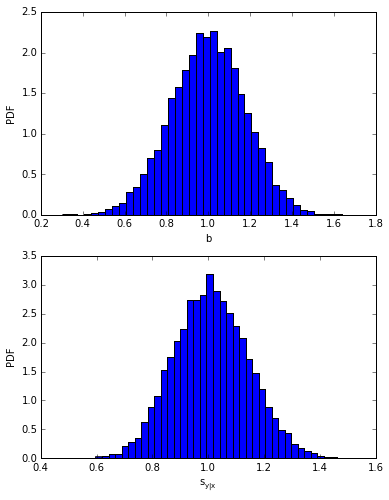

In [15]:
Ndat=30
a=1.
n=1.
x = np.random.randn(Ndat)
x=x-np.mean(x)

NMonte = 10000
b= np.zeros(NMonte)
syx=np.zeros(NMonte)
for ind in range(NMonte):
    ni = np.random.randn(Ndat)*n
    y = a*x+ni
    yy = y-np.mean(y)
    b[ind] = np.sum(yy*x)/np.sum(x*x)
    # get the s_{y|x}
    syx[ind]=np.sqrt(np.sum((y-b[ind]*x)**2)/(Ndat-2))
fig,ax=plt.subplots(2,1,figsize=(6,8))
nn,xbins,pp=ax[0].hist(b,40,normed=True);
ax[0].set_xlabel('b')
ax[0].set_ylabel('PDF')

ax[1].hist(syx,40,normed=True);
ax[1].set_xlabel('$s_{y|x}$')
ax[1].set_ylabel('PDF')



There is relatively large spread in the slope fits for this small amount of data, with a rough standard deviation of about 20%.  

**2** Assuming $s_{y|x}=1.$ (which is the same as our value of $n$), plot the student-t probability density function on the histogram of b and show that they compare favorably (if they don't you might need to check your work!)

<hr>

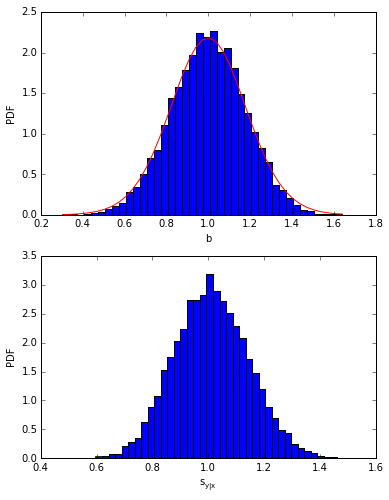

In [21]:
fig,ax=plt.subplots(2,1,figsize=(6,8))
nn,xbins,pp=ax[0].hist(b,40,normed=True);
ax[0].set_xlabel('b')
ax[0].set_ylabel('PDF')

ax[1].hist(syx,40,normed=True);
ax[1].set_xlabel('$s_{y|x}$')
ax[1].set_ylabel('PDF')

import scipy.stats as stats
p=stats.t.pdf(xbins,df=Ndat-2,loc=1.,scale=1./np.sqrt(sum(x**2)))

ax[0].plot(xbins,p,'r')


**3** Do the same procedure for a different number of data points, and a different value for the noise level $n$.  Remember to scale your theoretical histogram by the new expected value of $s_{y|x}$.

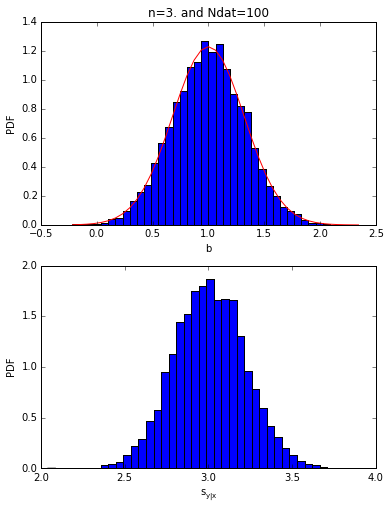

In [23]:
Ndat=100
a=1.
n=3.
x = np.random.randn(Ndat)
x=x-np.mean(x)

NMonte = 10000
b= np.zeros(NMonte)
syx=np.zeros(NMonte)
for ind in range(NMonte):
    ni = np.random.randn(Ndat)*n
    y = a*x+ni
    yy = y-np.mean(y)
    b[ind] = np.sum(yy*x)/np.sum(x*x)
    # get the s_{y|x}
    syx[ind]=np.sqrt(np.sum((y-b[ind]*x)**2)/(Ndat-2))
fig,ax=plt.subplots(2,1,figsize=(6,8))
nn,xbins,pp=ax[0].hist(b,40,normed=True);
ax[0].set_xlabel('b')
ax[0].set_ylabel('PDF')

ax[1].hist(syx,40,normed=True);
ax[1].set_xlabel('$s_{y|x}$')
ax[1].set_ylabel('PDF')

p=stats.t.pdf(xbins,df=Ndat-2,loc=1.,scale=np.mean(syx)/np.sqrt(sum(x**2)))

ax[0].plot(xbins,p,'r')
ax[0].set_title('n=3. and Ndat=100')


## Q3: Linear comparison of Deep Cove data to James Bay temperature data

Data was collected from a number of weather stations by the Victoria Weather Network.  In the file below is hourly temperature data (in degrees Celsius) and we will consider two of the stations in that file:

In [45]:
# Load the data:

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]
dcc=dc[np.isfinite(dc+jb)]
jb = jb[np.isfinite(dc+jb)]
dc=dcc

**1** Make a scatterplot of James Bay versus Deep Cove.

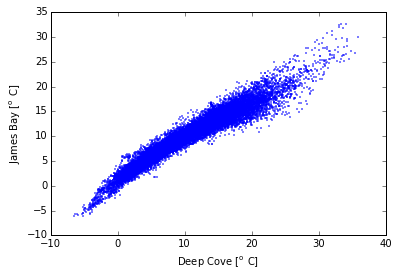

In [39]:
fig,ax=plt.subplots(1,1)
ax.plot(dc,jb,'.',markersize=2)
ax.set_xlabel('Deep Cove $[^oC]$');ax.set_ylabel('James Bay $[^oC]$')


**2** Compute the linear Correlation Co-efficient (without a canned routine)

In [40]:
N=len(jb)
print(N)
x=dc
y=jb
rxy = (1./(N-1.))*np.sum((x-np.mean(x))*(y-np.mean(y)))/np.std(x)/np.std(y)
print(rxy)

22702
0.965414194534


**3** Fit a straight line to the James Bay data as a fucntion of the Deep Cove data, and add to the scatter plot made above.  Comment on the fit.

<hr>

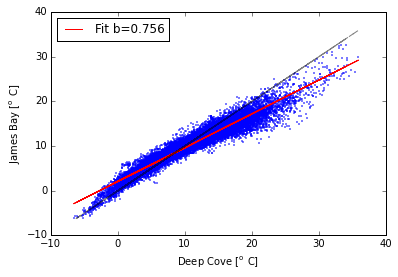

In [41]:
xm = np.nanmean(dc)
x = dc-xm
ym=np.nanmean(jb)
y = jb-ym

b = np.nansum(x*y)-N*np.nanmean(x)*np.nanmean(y)
b = b/(np.nansum(x**2)-N*np.nanmean(x)**2)

fig,ax=plt.subplots(1,1)
ax.plot(dc,jb,'.',markersize=2)
ax.set_xlabel('Deep Cove $[^oC]$');ax.set_ylabel('James Bay $[^oC]$')


ax.plot(x+xm,x*b+ym,'r',label='Fit b=%1.3f'%b)
ax.plot(x+xm,x+xm,'k--',alpha=0.5)
ax.legend(loc=2)

The fit passes through the data quite well, however there are clear and systematic regions where the two stations are not the same.  It is somewhat surprising that the degree of correlation is 0.96.  

**4** Add the confidence intervals to your fit, and comment.

1.22369726043
b=0.7565 +/- (0.7538,0.7591)


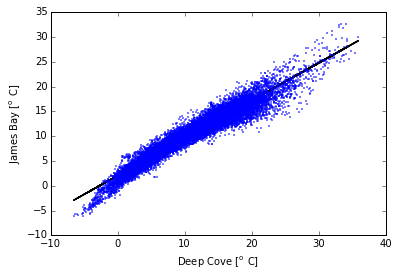

In [42]:
yhat = b*x
syx=np.nansum((y-yhat)**2)/(N-2)
syx=np.sqrt(syx)
print syx
import scipy.stats as stats

fig,ax=plt.subplots(1,1)
ax.plot(dc,jb,'.',markersize=2)
ax.set_xlabel('Deep Cove $[^oC]$');ax.set_ylabel('James Bay $[^oC]$')

intb=np.array(stats.t.interval(0.95,df=N-2))*syx/np.sqrt(np.nansum(x**2))
lowb = b+intb[0]
highb = b+intb[1]
ax.fill_between(x+xm,x*lowb+ym,x*highb+ym)


print 'b=%1.4f +/- (%1.4f,%1.4f)'%(b,lowb,highb)


The error in the fit is extremely small simply because there is so much data it is vanishingly unlikely that more data would change the fit (if the statistics of the underlying data don't change).  

**5** Note that we have assumed that the Deep Cove data is independent and that the James Bay data is dependent.  There is no reason to assume this!  Do the fit in the other direction, and compare the slopes.

0.811691939535


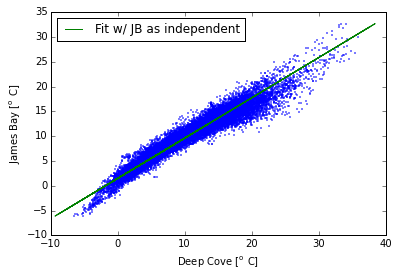

In [43]:
b = np.nansum(x*y)-N*np.nanmean(x)*np.nanmean(y)
b = b/(np.nansum(y**2)-N*np.nanmean(y)**2)
print 1./b

#Here x=xm+b*(y-ym)
fig,ax=plt.subplots(1,1)
ax.plot(dc,jb,'.',markersize=2)
ax.set_xlabel('Deep Cove $[^oC]$');ax.set_ylabel('James Bay $[^oC]$')

ax.plot(y*b+xm,y+ym,'g',label='Fit w/ JB as independent')
ax.legend(loc=2)


Note however that the slope fit by assuming James Bay is independent is not the same as the slope assuming Deep Cove is independent.  So, despite having very accurate fits, the assumptions of the linear model are not reciprocal, and we should always be careful when fitting models that we check our assumptions.  (This particular inconsistency shows up a *lot* in the literature, where the paper chooses one variable to be independent, and does a linear fit, despite there being no reason to think that variable is the truly independent variable).

**NOTE** There is a way to treat both axes independently called "Neutral Regression".  It is relatively simple, and involves normalizing the total distance of each point from the trend line. <a href="http://journals.ametsoc.org/doi/pdf/10.1175/1520-0426(1999)016%3C0876%3AAPFANR%3E2.0.CO%3B2">(Marsden 1999)</a>. This technique is strongly preferred if there is no reason to think that one data set is dependent on the other.  A caveat is that the data sets shoudl be normalized before fitting so that the "distance" has meaning.  